### TBC E-commerce Dataset of Period: June-2016 to Jan-2021

### Loading Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Importing the Datasets

In [2]:
df =pd.read_csv('Ecommerce Dataset.csv')
df_new=pd.read_csv('TBC_Ecommerce.csv')

In [3]:
df_new.head()

,SKU,Product,Order number,Date placed,Quantity,Unit price,Total price,Order status,Categories,Customer email,Customer phone,Customer name
0,2030301005022,The Wolf of Wall Street,20018,16/06/2016 20:43,1,350.0,332.5,Delivered,Books > Novels: Books > Biographies,oscar.nganga@gmail.com,2.547213e+11,Oscar Ng'Ang'A
1,2030301003312,Decision Points,20018,16/06/2016 20:43,1,1390.0,1320.5,Delivered,Books > Biographies,oscar.nganga@gmail.com,2.547213e+11,Oscar Ng'Ang'A
2,2030301004296,Ghana must go,20018,16/06/2016 20:43,1,950.0,902.5,Delivered,Books > Novels,oscar.nganga@gmail.com,2.547213e+11,Oscar Ng'Ang'A
3,2030301001226,Why He's So Last Minute And She's Got It All W...,20027,17/06/2016 01:38,1,350.0,350.0,Cancelled,Books > Motivation & Self Help,aligulaaa@gmail.com,2.547057e+11,Andrew
4,2030301002838,What the Dog Saw (Penguin),20027,17/06/2016 01:38,1,1200.0,1200.0,Cancelled,Books > Novels > Fiction: Books > Motivation &...,aligulaaa@gmail.com,2.547057e+11,Andrew


In [4]:
df =df.rename(columns={'Order number': 'Order_number'}, inplace = False)

### i) Exploration of Data

#### Shape of the Dataset by Row xColumns

In [5]:
df.shape

(116171, 3)

In [6]:
df_new.shape

(116171, 12)

#### Value Count on Popularity on the Entire Dataset

##### Popular Categories by Value

In [7]:
df_new['Categories'].value_counts()

Books > Children's Books                                                                                                           7345
Stationery > School Stationery                                                                                                     5255
Stationery > Pens, Pencils & Pouches                                                                                               5117
Art Supplies > Paints & Mediums                                                                                                    4866
Books > Novels > Fiction                                                                                                           4385
                                                                                                                                   ... 
Books > Novels: Books > Biographies: Books > Sports & Hobbies                                                                         1
Digital Books > Afrikaans                       

##### Popular Customer by Orders

In [8]:
df_new['Customer name'].value_counts()

Victoria Kritzell           1180
Julie Wilson                 845
HASSAN SUMBA                 586
Mr Wilson - Head Teacher     531
Anita                        523
                            ... 
CHRISTINA BULIBA               1
NOEL OJAKOL                    1
Olivia Pendergast              1
Antony Mumia                   1
Timothy Kabui                  1
Name: Customer name, Length: 19605, dtype: int64

In [9]:
#Extract Popular Customers by Orders as a list into Excel for Comparison.

popular_items = df_new['Customer name'].value_counts()
popular_items.to_csv(r'popular_customer.csv', index=True, header=True)

##### Popular Products by Customer Orders

In [10]:
df_new['Product'].value_counts()

Photocopy Paper A4 AONE                         614
A Promised Land (Barack Obama)                  338
Hp ink Cartridge 123 Black                      322
Born a crime                                    312
Pelikan Eraser BR40                             296
                                               ... 
Panya na Chura                                    1
KS3 Chemistry Study & Question Book - Higher      1
Improve your English Std 7 Workbook               1
Julius Caesar (EAEP)                              1
Champ Ball pen Red 25s                            1
Name: Product, Length: 16523, dtype: int64

#Recognizing these products may enhance inventory management and knowing products to consider for offers by Marketing

In [11]:
#Extract Popular Products as a list into Excel for Comparison.

popular_items = df_new['Product'].value_counts()
popular_items.to_csv(r'popular_items.csv', index=True, header=True)

In [12]:
df_new.columns

Index(['SKU', 'Product', 'Order number', 'Date placed', 'Quantity',
       'Unit price', 'Total price', 'Order status', 'Categories',
       'Customer email', 'Customer phone', 'Customer name'],
      dtype='object')

#### Plotting the Order Status by Value

In [13]:
df_new['Order status'].value_counts()

Delivered                       92935
Cancelled                        9505
Payment failed                   8012
Awaiting payment                 4571
Dispatched by EMS                 375
Consolidating                     265
Partially paid                    182
Dispatched by rider               121
Confirmed                          56
Pending                            54
Dispatched by G4S                  40
Delivered at pickup location       33
Dispatched                         22
Name: Order status, dtype: int64

##### Visualizing the Order Status using Bar-Graph

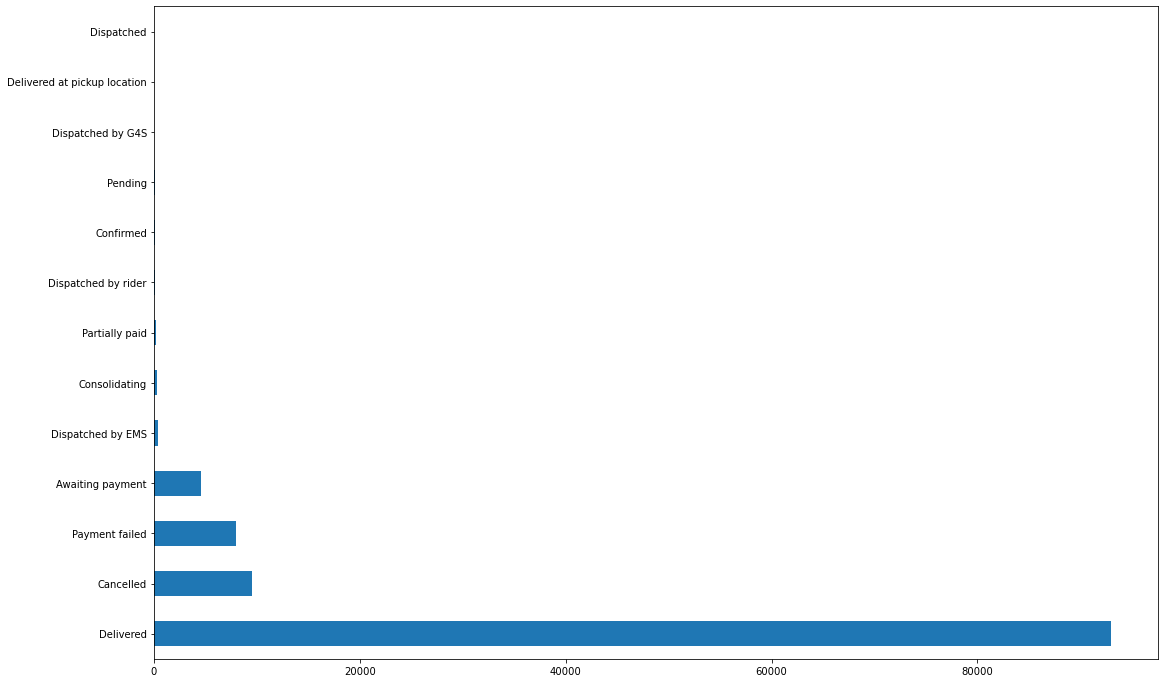

In [14]:
df_order = df_new['Order status'].value_counts()
df_order.plot(kind='barh', figsize=(18,12))

In [15]:
df1 =df.groupby(['Order_number','SKU'])[['SKU']].count().T
df1

Order_number        20018                                     20019   \
SKU          2030301003312 2030301004296 2030301005022 2010141001975   
SKU                      1             1             1             1   

Order_number                                    20027                 \
SKU          2030301001213 2030301001588 2030301001226 2030301002838   
SKU                      1             1             1             1   

Order_number        20029                 ...        377973                \
SKU          2040401001271 2040412000057  ... 2010116000045 2010116000046   
SKU                      1             1  ...             1             1   

Order_number                                    377974        378022  \
SKU          2010116000047 2010116000048 2010101001354 2010101001101   
SKU                      1             1             1             1   

Order_number                                    378026        378034  
SKU          2010101001782 2010117000646 9781118805800 2070701000090  
SKU                      1             1             1             1  

[1 rows x 116171 columns]

In [16]:
#Grouping of Order Number by SKU

In [17]:
df1 =df.groupby(['Order_number','SKU']).count()[['Date placed']]
df1

Date placed
Order_number SKU                       
20018        2030301003312            1
             2030301004296            1
             2030301005022            1
20019        2010141001975            1
             2030301001213            1
...                                 ...
378022       2010101001101            1
             2010101001782            1
             2010117000646            1
378026       9781118805800            1
378034       2070701000090            1

[116171 rows x 1 columns]

In [18]:
df2 =df.groupby(['Order_number','SKU']).count()
df2

Date placed
Order_number SKU                       
20018        2030301003312            1
             2030301004296            1
             2030301005022            1
20019        2010141001975            1
             2030301001213            1
...                                 ...
378022       2010101001101            1
             2010101001782            1
             2010117000646            1
378026       9781118805800            1
378034       2070701000090            1

[116171 rows x 1 columns]

In [19]:
#Time Series Analysis

In [20]:
df_new.head()

,SKU,Product,Order number,Date placed,Quantity,Unit price,Total price,Order status,Categories,Customer email,Customer phone,Customer name
0,2030301005022,The Wolf of Wall Street,20018,16/06/2016 20:43,1,350.0,332.5,Delivered,Books > Novels: Books > Biographies,oscar.nganga@gmail.com,2.547213e+11,Oscar Ng'Ang'A
1,2030301003312,Decision Points,20018,16/06/2016 20:43,1,1390.0,1320.5,Delivered,Books > Biographies,oscar.nganga@gmail.com,2.547213e+11,Oscar Ng'Ang'A
2,2030301004296,Ghana must go,20018,16/06/2016 20:43,1,950.0,902.5,Delivered,Books > Novels,oscar.nganga@gmail.com,2.547213e+11,Oscar Ng'Ang'A
3,2030301001226,Why He's So Last Minute And She's Got It All W...,20027,17/06/2016 01:38,1,350.0,350.0,Cancelled,Books > Motivation & Self Help,aligulaaa@gmail.com,2.547057e+11,Andrew
4,2030301002838,What the Dog Saw (Penguin),20027,17/06/2016 01:38,1,1200.0,1200.0,Cancelled,Books > Novels > Fiction: Books > Motivation &...,aligulaaa@gmail.com,2.547057e+11,Andrew


In [21]:
EcommerceData = df_new

In [22]:
EcommerceData.head()

,SKU,Product,Order number,Date placed,Quantity,Unit price,Total price,Order status,Categories,Customer email,Customer phone,Customer name
0,2030301005022,The Wolf of Wall Street,20018,16/06/2016 20:43,1,350.0,332.5,Delivered,Books > Novels: Books > Biographies,oscar.nganga@gmail.com,2.547213e+11,Oscar Ng'Ang'A
1,2030301003312,Decision Points,20018,16/06/2016 20:43,1,1390.0,1320.5,Delivered,Books > Biographies,oscar.nganga@gmail.com,2.547213e+11,Oscar Ng'Ang'A
2,2030301004296,Ghana must go,20018,16/06/2016 20:43,1,950.0,902.5,Delivered,Books > Novels,oscar.nganga@gmail.com,2.547213e+11,Oscar Ng'Ang'A
3,2030301001226,Why He's So Last Minute And She's Got It All W...,20027,17/06/2016 01:38,1,350.0,350.0,Cancelled,Books > Motivation & Self Help,aligulaaa@gmail.com,2.547057e+11,Andrew
4,2030301002838,What the Dog Saw (Penguin),20027,17/06/2016 01:38,1,1200.0,1200.0,Cancelled,Books > Novels > Fiction: Books > Motivation &...,aligulaaa@gmail.com,2.547057e+11,Andrew


In [23]:
#Renaming the Columns of the Dataset

EcommerceData.rename(columns={'SKU':'SKU', 'Product':'Product', 'Order number':'OrderNumber', 'Date placed':'OrderDate', 
                              'Quantity':'Quantity','Unit price':'UnitPrice', 'Total price':'TotalPrice', 
                              'Order status':'OrderStatus','Categories':'Categories','Customer email':'CustomerEmail', 
                              'Customer phone':'CustomerPhone','Customer name':'CustomerName'}, inplace=True)
                              

In [24]:
EcommerceData.head()

,SKU,Product,OrderNumber,OrderDate,Quantity,UnitPrice,TotalPrice,OrderStatus,Categories,CustomerEmail,CustomerPhone,CustomerName
0,2030301005022,The Wolf of Wall Street,20018,16/06/2016 20:43,1,350.0,332.5,Delivered,Books > Novels: Books > Biographies,oscar.nganga@gmail.com,2.547213e+11,Oscar Ng'Ang'A
1,2030301003312,Decision Points,20018,16/06/2016 20:43,1,1390.0,1320.5,Delivered,Books > Biographies,oscar.nganga@gmail.com,2.547213e+11,Oscar Ng'Ang'A
2,2030301004296,Ghana must go,20018,16/06/2016 20:43,1,950.0,902.5,Delivered,Books > Novels,oscar.nganga@gmail.com,2.547213e+11,Oscar Ng'Ang'A
3,2030301001226,Why He's So Last Minute And She's Got It All W...,20027,17/06/2016 01:38,1,350.0,350.0,Cancelled,Books > Motivation & Self Help,aligulaaa@gmail.com,2.547057e+11,Andrew
4,2030301002838,What the Dog Saw (Penguin),20027,17/06/2016 01:38,1,1200.0,1200.0,Cancelled,Books > Novels > Fiction: Books > Motivation &...,aligulaaa@gmail.com,2.547057e+11,Andrew


In [25]:
#Convert OrderDate to Datetime

EcommerceData['OrderDate'] = pd.to_datetime(EcommerceData['OrderDate'])

In [26]:
EcommerceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116171 entries, 0 to 116170
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   SKU            116171 non-null  object        
 1   Product        115373 non-null  object        
 2   OrderNumber    116171 non-null  int64         
 3   OrderDate      116171 non-null  datetime64[ns]
 4   Quantity       116171 non-null  int64         
 5   UnitPrice      116171 non-null  float64       
 6   TotalPrice     116171 non-null  float64       
 7   OrderStatus    116171 non-null  object        
 8   Categories     115108 non-null  object        
 9   CustomerEmail  116048 non-null  object        
 10  CustomerPhone  114455 non-null  float64       
 11  CustomerName   114786 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 10.6+ MB


In [27]:
EcommerceData = EcommerceData.set_index('OrderDate')

In [28]:
EcommerceData.head()

,SKU,Product,OrderNumber,Quantity,UnitPrice,TotalPrice,OrderStatus,Categories,CustomerEmail,CustomerPhone,CustomerName
OrderDate,,,,,,,,,,,
2016-06-16 20:43:00,2030301005022,The Wolf of Wall Street,20018,1,350.0,332.5,Delivered,Books > Novels: Books > Biographies,oscar.nganga@gmail.com,2.547213e+11,Oscar Ng'Ang'A
2016-06-16 20:43:00,2030301003312,Decision Points,20018,1,1390.0,1320.5,Delivered,Books > Biographies,oscar.nganga@gmail.com,2.547213e+11,Oscar Ng'Ang'A
2016-06-16 20:43:00,2030301004296,Ghana must go,20018,1,950.0,902.5,Delivered,Books > Novels,oscar.nganga@gmail.com,2.547213e+11,Oscar Ng'Ang'A
2016-06-17 01:38:00,2030301001226,Why He's So Last Minute And She's Got It All W...,20027,1,350.0,350.0,Cancelled,Books > Motivation & Self Help,aligulaaa@gmail.com,2.547057e+11,Andrew
2016-06-17 01:38:00,2030301002838,What the Dog Saw (Penguin),20027,1,1200.0,1200.0,Cancelled,Books > Novels > Fiction: Books > Motivation &...,aligulaaa@gmail.com,2.547057e+11,Andrew


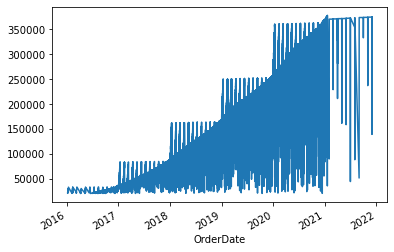

In [29]:
EcommerceData['OrderNumber'].plot(kind='line')

In [30]:
EcommerceData['Quantity'].resample(rule='A').mean()

OrderDate
2016-12-31    1.638517
2017-12-31    1.725082
2018-12-31    1.602872
2019-12-31    1.846176
2020-12-31    1.586022
2021-12-31    1.579149
Freq: A-DEC, Name: Quantity, dtype: float64

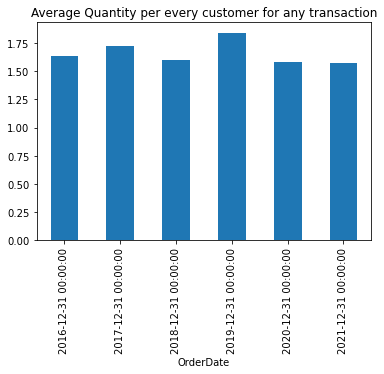

In [31]:
#Average Quantity per every customer for any transaction
title = 'Average Quantity per every customer for any transaction'
EcommerceData['Quantity'].resample(rule='A').mean().plot.bar(title=title, color=['#1f77b4']);

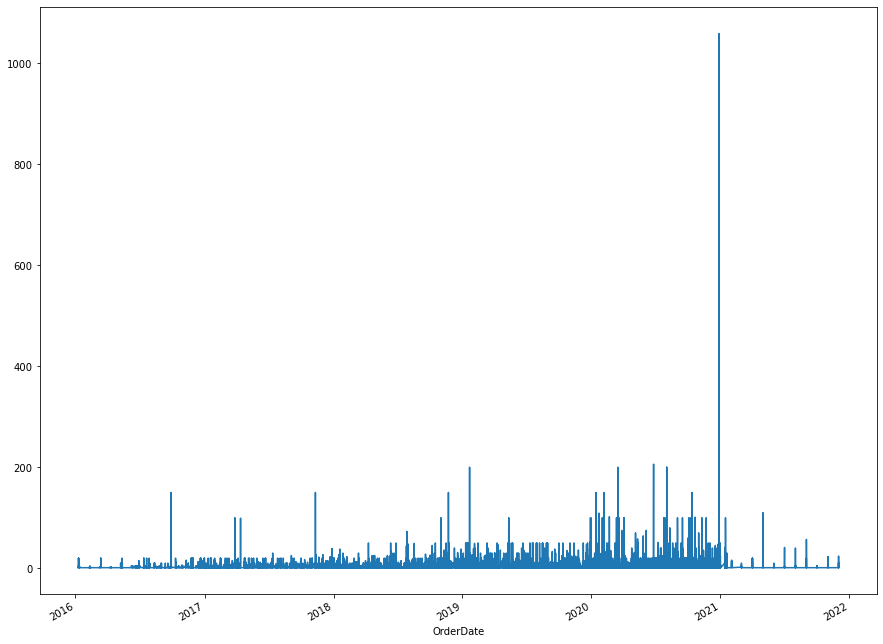

In [32]:
EcommerceData['Quantity'].plot(figsize = (15,12))

<BarContainer object of 16861 artists>

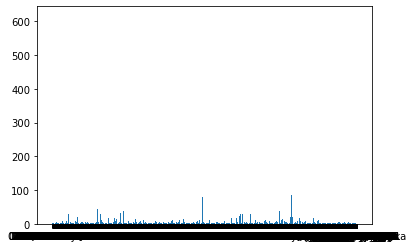

In [33]:
import matplotlib.pyplot as plt
keys =[SKU for SKU, df in df.groupby(['SKU'])]
plt.bar(keys,df.groupby(['SKU']).count()['Order_number'])

In [34]:
import matplotlib.pyplot as plt
keys =[SKU for SKU, df in df.groupby(['SKU'])]
pd.DataFrame(keys,df.groupby(['SKU']).count()['Order_number']).T

Order_number,1,1,2,1,2,6,1,7,5,3,...,1,2,1,2,1,1,1,1,1,2
0,0GEQNMB7UJQM1,0WPZX9VT5PQPN,1K9KCYM8LC6LM,1UXI2W02NG5ZY,2,2000000000,2010101000004,2010101000012,2010101000014,2010101000015,...,pg820,pg844,pg8667,pg8993,pg940,pg946,pg969-images,pg98-images,pg9880,pg996-images


In [35]:
#SKU_group = pd.DataFrame(keys,df.groupby(['SKU']).count()['Order_number']).T
#SKU_group.count()['Order_number']

In [36]:
'''
load apriori and association package from mlxtend. 
Used different dataset because mlxtend need data in below format. 

             itemname  apple banana grapes
transaction  1            0    1     1
             2            1    0     1  
             3            1    0     0
             4            0    1     0
             
 we could have used above data as well but need to perform operation to bring in this format instead /
 of that used seperate data only.            
'''


from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

df1 = pd.read_csv('TBC_Ecommerce.csv', encoding="ISO-8859-1")
df1.head()

,SKU,Product,Order number,Date placed,Quantity,Unit price,Total price,Order status,Categories,Customer email,Customer phone,Customer name
0,2030301005022,The Wolf of Wall Street,20018,16/06/2016 20:43,1,350.0,332.5,Delivered,Books > Novels: Books > Biographies,oscar.nganga@gmail.com,2.547213e+11,Oscar Ng'Ang'A
1,2030301003312,Decision Points,20018,16/06/2016 20:43,1,1390.0,1320.5,Delivered,Books > Biographies,oscar.nganga@gmail.com,2.547213e+11,Oscar Ng'Ang'A
2,2030301004296,Ghana must go,20018,16/06/2016 20:43,1,950.0,902.5,Delivered,Books > Novels,oscar.nganga@gmail.com,2.547213e+11,Oscar Ng'Ang'A
3,2030301001226,Why He's So Last Minute And She's Got It All W...,20027,17/06/2016 01:38,1,350.0,350.0,Cancelled,Books > Motivation & Self Help,aligulaaa@gmail.com,2.547057e+11,Andrew
4,2030301002838,What the Dog Saw (Penguin),20027,17/06/2016 01:38,1,1200.0,1200.0,Cancelled,Books > Novels > Fiction: Books > Motivation &...,aligulaaa@gmail.com,2.547057e+11,Andrew


In [37]:
# data has many country choose any one for check..
df1.SKU.value_counts().head(15)

2040417000356    614
BK00000000818    338
2060607000851    322
2030310000330    312
2040411000046    296
2030310000383    281
2040405000137    273
2040405000150    248
2040410000016    247
2060607000557    246
2040407000019    232
2010122000062    229
2030301007037    220
2030301006141    212
2040404000159    204
Name: SKU, dtype: int64

In [38]:
#convert data in format which it require converting using pivot table and Quantity sum as values. fill 0 if any nan values

basket = pd.pivot_table(data=df1,index='Order number',columns='Product',values='Quantity', aggfunc='sum',fill_value=0)

In [39]:
#Convert data in format which it require converting using pivot table and Quantity sum as values. fill 0 if any nan values

basket = pd.pivot_table(data=df1,index='Order number',columns='Product',values='Quantity', aggfunc='sum',fill_value=0)

In [40]:
basket.head()

Product,"""A"" Finder Biology Practical Answer booklet","""A"" Finder Biology Practical Manual","""A"" Finder Chemistry Practical Answer booklet","""A"" Finder Chemistry Practical Manual","""A"" Finder Physics Practical Answer booklet","""A"" Finder Physics Practical Manual","""Bantex Clipboard plastic 9859- 01 Blue""","""Bantex Clipboard plastic 9859- 09 Red""","""Bantex PVC folder 3420-04 Green""","""Koko riko nani ameniamsha?""",...,ladybird Tales : The Little Red Hen,little Oxford Thesaurus,pelikan Marker Blue Chisel 740 213957,pelikan Watercolor Schoolars 12pcs Cakes,read it yourself with Ladybird level 4 - The Wizard of Oz,smooth Surface Cartridge pad A5 130g 6689615 30s,song of lawino and song of ocol,steadtler pencil 110 3H,the Jail Bugs,âEmerging Africa: How the Global Economyâs Last Frontier Can Prosper and Matterâ
Order number,,,,,,,,,,,,,,,,,,,,,
20018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#this to check correctness after binning it to 1 at below code..
basket['What the Dog Saw (Penguin)'].head()

Order number
20018    0
20019    0
20027    1
20029    0
20030    0
Name: What the Dog Saw (Penguin), dtype: int64

In [42]:
# we dont need quantity sum we need either has taken or not so if user has taken that item mark as 1 else he has not taken 0.

def convert_into_binary(x):
    if x > 0:
        return 1
    else:
        return 0

In [43]:
basket_sets = basket.applymap(convert_into_binary)

In [44]:
# above steps we can same item has quantity now converted to 1 or 0.
basket_sets['The Wolf of Wall Street'].head()

Order number
20018    1
20019    0
20027    0
20029    0
20030    0
Name: The Wolf of Wall Street, dtype: int64

In [46]:
#Call apriori function and pass minimum support here we are passing 7%. means 7 times in total number of \`
 #transaction that item was present.
frequent_itemsets = apriori(basket_sets, min_support=0.003, use_colnames=True)

In [47]:
#it will generate frequent itemsets using two step approch
frequent_itemsets

,support,itemsets
0,0.003223,(5Am Club (The))
1,0.004398,(A Doll's House)
2,0.010181,(A Promised Land (Barack Obama))
3,0.003223,(Americanah)
4,0.008464,(Becoming By Michelle Obama (Hard Cover))
...,...,...
82,0.003313,(When Breath Becomes Air (Small))
83,0.003103,"(Why Nations fail:The Origins of Power, Prospe..."
84,0.004910,"(Hp Ink Cartidge 650 Black, Hp Ink Cartidge 65..."
85,0.004127,"(Hp Ink Cartidge 652 Black, Hp Ink Cartidge 65..."


In [48]:
frequent_itemsets.to_csv(r'frequent_tbc_items.csv', index=False, header=True)

In [49]:
frequent_itemsets.count()

support     87
itemsets    87
dtype: int64

In [50]:
# we have association rules which need to put on frequent itemset. here we are setting based on lift and has minimum lift as 1
rules_mlxtend = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_mlxtend.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Hp Ink Cartidge 650 Black),(Hp Ink Cartidge 650 Colour),0.007410,0.005663,0.004910,0.662602,117.005579,0.004868,2.947071
1,(Hp Ink Cartidge 650 Colour),(Hp Ink Cartidge 650 Black),0.005663,0.007410,0.004910,0.867021,117.005579,0.004868,7.464276
2,(Hp Ink Cartidge 652 Black),(Hp Ink Cartidge 652 Colour),0.005633,0.004850,0.004127,0.732620,151.065400,0.004099,3.721862
3,(Hp Ink Cartidge 652 Colour),(Hp Ink Cartidge 652 Black),0.004850,0.005633,0.004127,0.850932,151.065400,0.004099,6.670546
4,(Hp ink Cartridge 123 Colour),(Hp ink Cartridge 123 Black),0.005814,0.009699,0.004880,0.839378,86.539375,0.004823,6.165420


In [51]:
ruless=rules_mlxtend.head()

In [52]:
ruless

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Hp Ink Cartidge 650 Black),(Hp Ink Cartidge 650 Colour),0.007410,0.005663,0.004910,0.662602,117.005579,0.004868,2.947071
1,(Hp Ink Cartidge 650 Colour),(Hp Ink Cartidge 650 Black),0.005663,0.007410,0.004910,0.867021,117.005579,0.004868,7.464276
2,(Hp Ink Cartidge 652 Black),(Hp Ink Cartidge 652 Colour),0.005633,0.004850,0.004127,0.732620,151.065400,0.004099,3.721862
3,(Hp Ink Cartidge 652 Colour),(Hp Ink Cartidge 652 Black),0.004850,0.005633,0.004127,0.850932,151.065400,0.004099,6.670546
4,(Hp ink Cartridge 123 Colour),(Hp ink Cartridge 123 Black),0.005814,0.009699,0.004880,0.839378,86.539375,0.004823,6.165420


In [53]:
ruless.to_csv(r'ruless_tbc_items.csv', index=False, header=True)

In [54]:
# rules_mlxtend.rename(columns={'antecedents':'lhs','consequents':'rhs'})

# as based business use case we can sort based on confidance and lift.
rules_mlxtend[ (rules_mlxtend['lift'] >= 4) & (rules_mlxtend['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Hp Ink Cartidge 650 Colour),(Hp Ink Cartidge 650 Black),0.005663,0.007410,0.004910,0.867021,117.005579,0.004868,7.464276
3,(Hp Ink Cartidge 652 Colour),(Hp Ink Cartidge 652 Black),0.004850,0.005633,0.004127,0.850932,151.065400,0.004099,6.670546
4,(Hp ink Cartridge 123 Colour),(Hp ink Cartridge 123 Black),0.005814,0.009699,0.004880,0.839378,86.539375,0.004823,6.165420


In [55]:
rules_mlxtend.shape

(6, 9)

In [56]:
rules_mlxtend.to_csv(r'rmxtend_tbc_items.csv', index=False, header=True)

Directed graph below is built for this rule and shown below. it will have always incoming and outcoming edges. Incoming edge(s) will represent antecedants and the stub (arrow) will be next to node.

In [58]:
# rules_mlxtend.rename(columns={'antecedents':'lhs','consequents':'rhs'})

# as based business use case we can sort based on confidance and lift.
rules_mlxtend[ (rules_mlxtend['lift'] >= 4) & (rules_mlxtend['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Hp Ink Cartidge 650 Black),(Hp Ink Cartidge 650 Colour),0.007410,0.005663,0.004910,0.662602,117.005579,0.004868,2.947071
1,(Hp Ink Cartidge 650 Colour),(Hp Ink Cartidge 650 Black),0.005663,0.007410,0.004910,0.867021,117.005579,0.004868,7.464276
2,(Hp Ink Cartidge 652 Black),(Hp Ink Cartidge 652 Colour),0.005633,0.004850,0.004127,0.732620,151.065400,0.004099,3.721862
3,(Hp Ink Cartidge 652 Colour),(Hp Ink Cartidge 652 Black),0.004850,0.005633,0.004127,0.850932,151.065400,0.004099,6.670546
4,(Hp ink Cartridge 123 Colour),(Hp ink Cartridge 123 Black),0.005814,0.009699,0.004880,0.839378,86.539375,0.004823,6.165420
5,(Hp ink Cartridge 123 Black),(Hp ink Cartridge 123 Colour),0.009699,0.005814,0.004880,0.503106,86.539375,0.004823,2.000800


In [59]:
rules_mlxtend.shape

(6, 9)